starting


/Users/JoshetaaMacbookPro/Desktop/Evolutionaty Robotics/ctrnn_leg.py:45: RuntimeWarning: overflow encountered in multiply
  self.Voltage += dt * (self.invTimeConstant*(-self.Voltage+netinput))
/Users/JoshetaaMacbookPro/Desktop/Evolutionaty Robotics/ctrnn_leg.py:45: RuntimeWarning: invalid value encountered in add
  self.Voltage += dt * (self.invTimeConstant*(-self.Voltage+netinput))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


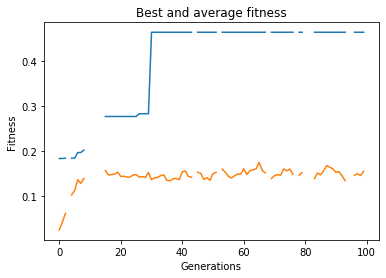

Average velocity = 0.5120319752161473


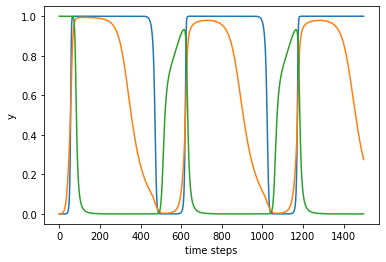

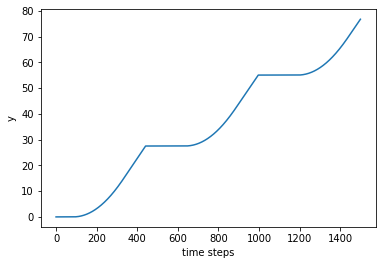

In [9]:
## Method 1: Adding different noise levels to parameters ##
import mga
import ctrnn_leg
import leggedwalker
import numpy as np
import matplotlib.pyplot as plt

# NS parameters
N = 3
I = 1
WR = 16
SWR = 0
BR = 16
TMIN = 0.5
TMAX = 10.0

# Task Params
MaxFit = 0.627
duration = 150 #220.0
stepsize = 0.1

# Fitness Function parameters 
trials = 5 # number of evaluation trials for fitness value

time = np.arange(0.0,duration,stepsize)

def fitnessFunction(genotype):

    # S.D = 0.1
    noise_1 = np.random.normal(0,0.1,len(genotype))
    genotype += noise_1
    fitArray_1 = np.zeros(trials)
    for i in range(trials):
        ns = ctrnn_leg.CTRNN(N)
        ns.setParameters(genotype,WR,BR,TMIN,TMAX)
        ns.initializeState(np.zeros(N))
        body = leggedwalker.LeggedAgent()
        for t in time:
            ns.step(stepsize,body.out())
            body.step3(stepsize,ns.out3(),0)
        fitArray_1[i] += body.cx/duration
        
    fit_1 = np.mean(fitArray_1)

    # S.D = 0.2
    noise_2 = np.random.normal(0,0.2,len(genotype))
    genotype += noise_2
    fitArray_2 = np.zeros(trials)
    for i in range(trials):
        ns = ctrnn_leg.CTRNN(N)
        ns.setParameters(genotype,WR,BR,TMIN,TMAX)
        ns.initializeState(np.zeros(N))
        body = leggedwalker.LeggedAgent()
        for t in time:
            ns.step(stepsize,body.out())
            body.step3(stepsize,ns.out3(),0)
        fitArray_2[i] += body.cx/duration
        
    fit_2 = np.mean(fitArray_2)
    
    # S.D = 0.3
    noise_3 = np.random.normal(0,0.3,len(genotype))
    genotype += noise_3
    fitArray_3 = np.zeros(trials)
    for i in range(trials):
        ns = ctrnn_leg.CTRNN(N)
        ns.setParameters(genotype,WR,BR,TMIN,TMAX)
        ns.initializeState(np.zeros(N))
        body = leggedwalker.LeggedAgent()
        for t in time:
            ns.step(stepsize,body.out())
            body.step3(stepsize,ns.out3(),0)
        fitArray_3[i] += body.cx/duration
        
    fit_3 = np.mean(fitArray_3)
    
    
    fit = (fit_1+fit_2+fit_3)/3
    return fit

# EA Params
popsize = 100 
genesize = N*N + 3*N
recombProb = 0.5
mutatProb = 0.1
demesize = 50
generations = 100 #500

# Evolve and visualize fitness over generations
ga = mga.Microbial(fitnessFunction, popsize, genesize, recombProb, mutatProb, demesize, generations)
ga.run()
ga.showFitness()

# show
avgfit, bestfit, bestind = ga.fitStats()
ns = ctrnn_leg.CTRNN(N)                     
ns.setParameters(bestind,WR,BR,TMIN,TMAX)
body = leggedwalker.LeggedAgent()

out_hist = np.zeros((len(time),N))
cx_hist = np.zeros(len(time))

i = 0
for t in time:
    ns.step(stepsize,body.out())
    body.step3(stepsize,ns.out3(),0)
    out_hist[i] = ns.Output
    cx_hist[i] = body.cx
    i+=1
print("Average velocity = " + str(body.cx/duration))

plt.plot(out_hist)
plt.xlabel("time steps")
plt.ylabel("y")
plt.show()

plt.plot(cx_hist)
plt.xlabel("time steps")
plt.ylabel("y")
plt.show()


starting
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


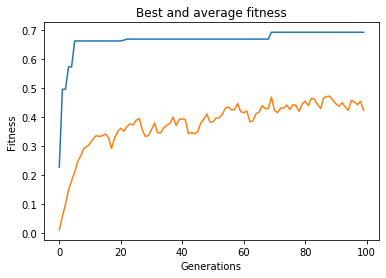

Average velocity = 0.18605061886306895


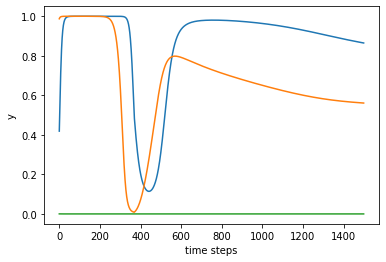

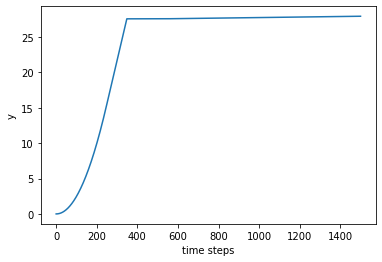

In [8]:
## Method 3: Adding different color noise to motor output ##
import mga
import ctrnn_leg
import leggedwalker
import numpy as np
import matplotlib.pyplot as plt
import colorednoise as cn

# NS parameters
N = 3
I = 1
WR = 16
SWR = 0
BR = 16
TMIN = 0.5
TMAX = 10.0

# Task Params
MaxFit = 0.627
duration = 150 #220.0
stepsize = 0.1

# Fitness Function parameters 
trials = 5 # number of evaluation trials for fitness value
noise_w = cn.powerlaw_psd_gaussian(0, int(duration/stepsize))
noise_p = cn.powerlaw_psd_gaussian(1, int(duration/stepsize))
noise_b = cn.powerlaw_psd_gaussian(2, int(duration/stepsize))

time = np.arange(0.0,duration,stepsize)


def fitnessFunction(genotype):
    
    # White noise 
    fitArray_w = np.zeros(trials)
    for i in range(trials):
        ns = ctrnn_leg.CTRNN(N)
        ns.setParameters(genotype,WR,BR,TMIN,TMAX)
        ns.initializeState(np.zeros(N))
        body = leggedwalker.LeggedAgent()
        for t in range(len(time)):
            ns.step(stepsize,body.out())
            body.step3(stepsize,ns.out3(),noise_w[t])
        fitArray_w[i] = body.cx/duration
    
    fit_w = np.mean(fitArray_w)
    
    
    # Pink noise 
    fitArray_p = np.zeros(trials)
    for i in range(trials):
        ns = ctrnn_leg.CTRNN(N)
        ns.setParameters(genotype,WR,BR,TMIN,TMAX)
        ns.initializeState(np.zeros(N))
        body = leggedwalker.LeggedAgent()
        for t in range(len(time)):
            ns.step(stepsize,body.out())
            body.step3(stepsize,ns.out3(),noise_p[t])
        fitArray_p[i] = body.cx/duration
    
    fit_p = np.mean(fitArray_p)
    
    
    # Brown noise 
    fitArray_b = np.zeros(trials)
    for i in range(trials):
        ns = ctrnn_leg.CTRNN(N)
        ns.setParameters(genotype,WR,BR,TMIN,TMAX)
        ns.initializeState(np.zeros(N))
        body = leggedwalker.LeggedAgent()
        for t in range(len(time)):
            ns.step(stepsize,body.out())
            body.step3(stepsize,ns.out3(),noise_b[t])
        fitArray_b[i] = body.cx/duration
    
    fit_b = np.mean(fitArray_b)
    
    
    fit = (fit_w+fit_p+fit_b)/3
    return fit

# EA Params
popsize = 100
genesize = N*N + 3*N
recombProb = 0.5
mutatProb = 0.1
demesize = 50
generations = 100 # 500

# Evolve and visualize fitness over generations
ga = mga.Microbial(fitnessFunction, popsize, genesize, recombProb, mutatProb, demesize, generations)
ga.run()
ga.showFitness()

# show
avgfit, bestfit, bestind = ga.fitStats()
ns = ctrnn_leg.CTRNN(N)                     
ns.setParameters(bestind,WR,BR,TMIN,TMAX)
body = leggedwalker.LeggedAgent()

out_hist = np.zeros((len(time),N))
cx_hist = np.zeros(len(time))

i = 0
for t in time:
    ns.step(stepsize,body.out())
    body.step3(stepsize,ns.out3(),0)
    out_hist[i] = ns.Output
    cx_hist[i] = body.cx
    i+=1
print("Average velocity = " + str(body.cx/duration))

plt.plot(out_hist)
plt.xlabel("time steps")
plt.ylabel("y")
plt.show()

plt.plot(cx_hist)
plt.xlabel("time steps")
plt.ylabel("y")
plt.show()



# Method 1 
RUN TIME (100 generations) ~ 1 hr 23 min
4 minutes --> 4 gen
31 minutes --> 41 gen
45 minutws --> 60 gen
1hr 9 minutes --> 90 gen
1 hr 23 minutes --> 100 gen

Odd things: 
- missing values?

# Method 2
RUN TIME (100 generations) ~ 
50 gen --> 38 minutes 
75 gen --> 1 hour 
100 --> 1 hr 30 mins 

Odd things: 
- wierd v/t graph